## 2. Data Visualization ###

In [61]:
import pandas as pd
import numpy as np

#To find the file encoding type
import chardet
import matplotlib.pyplot as plt
import seaborn as sns
import re
import glob

#plotly
import plotly as py
import plotly.graph_objs as go
import cufflinks as cf

In [62]:
pd.set_option('display.max_columns', None)


In [63]:
df = pd.read_csv('cleaned_school_df.csv', sep='\t')
df.drop('Unnamed: 0', axis=1,inplace=True)
df.head()

,Demographic ID,Demographic Name,Student Group,County Code,District Code,School Code,Grade,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met,Total Number of Students with Valid Scores,Life Sciences Domain Percent Below Standard,Life Sciences Domain Percent Near Standard,Life Sciences Domain Percent Above Standard,Physical Sciences Domain Percent Below Standard,Physical Sciences Domain Percent Near Standard,Physical Sciences Domain Percent Above Standard,Earth and Space Sciences Domain Percent Below Standard,Earth and Space Sciences Domain Percent Near Standard,Earth and Space Sciences Domain Percent Above Standard,County Name,District Name,School Name,Zip Code,Median
0,1,All Students,All Students,2,61333,6002794,5,9.09,18.18,63.64,9.09,11.0,54.55,36.36,9.09,36.36,54.55,9.09,36.36,63.64,0.00,Alpine,Alpine County Unified,Diamond Valley Elementary,96120,3042249.5
1,1,All Students,All Students,2,61333,6002794,13,9.52,33.33,52.38,4.76,21.0,42.86,42.86,14.29,28.57,57.14,14.29,33.33,42.86,23.81,Alpine,Alpine County Unified,Diamond Valley Elementary,96120,3042249.5
2,1,All Students,All Students,6,61622,118729,5,0.94,10.38,55.66,33.02,106.0,67.92,31.13,0.94,64.76,34.29,0.95,62.26,35.85,1.89,Colusa,Williams Unified,Williams Upper Elementary,95987,692087.0
3,1,All Students,All Students,6,61622,118729,13,0.94,10.38,55.66,33.02,106.0,67.92,31.13,0.94,64.76,34.29,0.95,62.26,35.85,1.89,Colusa,Williams Unified,Williams Upper Elementary,95987,692087.0
4,1,All Students,All Students,6,61622,637504,8,0.00,3.96,45.54,50.50,101.0,71.58,28.42,0.00,77.66,22.34,0.00,75.82,24.18,0.00,Colusa,Williams Unified,Williams Junior/Senior High,95987,692087.0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5697 entries, 0 to 5696
Data columns (total 26 columns):
Demographic ID                                            5697 non-null int64
Demographic Name                                          5697 non-null object
Student Group                                             5697 non-null object
County Code                                               5697 non-null int64
District Code                                             5697 non-null int64
School Code                                               5697 non-null int64
Grade                                                     5697 non-null int64
Percentage Standard Exceeded                              5697 non-null float64
Percentage Standard Met                                   5697 non-null float64
Percentage Standard Nearly Met                            5697 non-null float64
Percentage Standard Not Met                               5697 non-null float64
Total Number of Students 

Let's take a look at the unique student groups

In [65]:
df['Student Group'].value_counts()

English-Language Fluency                        1077
Parent Education                                 749
Gender                                           557
Ethnicity                                        553
Economic Status                                  534
Disability Status                                461
Ethnicity for Economically Disadvantaged         385
Homeless Status                                  380
Military Status                                  375
All Students                                     375
Ethnicity for Not Economically Disadvantaged     241
Migrant                                           10
Name: Student Group, dtype: int64


Let's take a look at unique schools

In [66]:
print("Total number of Schools")
df['School Name'].nunique()


Total number of Schools


157

In [67]:
df.columns

Index(['Demographic ID', 'Demographic Name', 'Student Group', 'County Code',
       'District Code', 'School Code', 'Grade', 'Percentage Standard Exceeded',
       'Percentage Standard Met', 'Percentage Standard Nearly Met',
       'Percentage Standard Not Met',
       'Total Number of Students with Valid Scores',
       'Life Sciences Domain Percent Below Standard',
       'Life Sciences Domain Percent Near Standard',
       'Life Sciences Domain Percent Above Standard',
       'Physical Sciences Domain Percent Below Standard',
       'Physical Sciences Domain Percent Near Standard',
       'Physical Sciences Domain Percent Above Standard',
       'Earth and Space Sciences Domain Percent Below Standard',
       'Earth and Space Sciences Domain Percent Near Standard',
       'Earth and Space Sciences Domain Percent Above Standard', 'County Name',
       'District Name', 'School Name', 'Zip Code', 'Median'],
      dtype='object')

In [68]:
df.groupby(["County Name", "Student Group"], as_index=False).mean()


,County Name,Student Group,Demographic ID,County Code,District Code,School Code,Grade,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met,Total Number of Students with Valid Scores,Life Sciences Domain Percent Below Standard,Life Sciences Domain Percent Near Standard,Life Sciences Domain Percent Above Standard,Physical Sciences Domain Percent Below Standard,Physical Sciences Domain Percent Near Standard,Physical Sciences Domain Percent Above Standard,Earth and Space Sciences Domain Percent Below Standard,Earth and Space Sciences Domain Percent Near Standard,Earth and Space Sciences Domain Percent Above Standard,Zip Code,Median
0,Alpine,All Students,1.000000,2.0,61333.0,6.002794e+06,9.000000,9.305000,25.755000,58.010000,6.925000,16.000000,48.705000,39.610000,11.690000,32.465000,55.845000,11.690000,34.845000,53.250000,11.905000,96120.0,3.042250e+06
1,Alpine,Disability Status,99.000000,2.0,61333.0,6.002794e+06,13.000000,10.000000,35.000000,50.000000,5.000000,20.000000,45.000000,40.000000,15.000000,30.000000,55.000000,15.000000,35.000000,40.000000,25.000000,96120.0,3.042250e+06
2,Alpine,Economic Status,31.000000,2.0,61333.0,6.002794e+06,13.000000,0.000000,41.670000,50.000000,8.330000,12.000000,50.000000,41.670000,8.330000,33.330000,66.670000,0.000000,33.330000,41.670000,25.000000,96120.0,3.042250e+06
3,Alpine,English-Language Fluency,93.000000,2.0,61333.0,6.002794e+06,9.000000,9.305000,25.755000,58.010000,6.925000,16.000000,48.705000,39.610000,11.690000,32.465000,55.845000,11.690000,34.845000,53.250000,11.905000,96120.0,3.042250e+06
4,Alpine,Ethnicity,80.000000,2.0,61333.0,6.002794e+06,13.000000,16.670000,33.330000,50.000000,0.000000,12.000000,41.670000,33.330000,25.000000,16.670000,58.330000,25.000000,25.000000,58.330000,16.670000,96120.0,3.042250e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,Trinity,Ethnicity for Not Economically Disadvantaged,226.000000,53.0,71696.0,6.053722e+06,13.000000,35.710000,28.570000,35.710000,0.000000,14.000000,21.430000,42.860000,35.710000,0.000000,71.430000,28.570000,7.140000,50.000000,42.860000,96024.0,6.818660e+05
147,Trinity,Gender,3.333333,53.0,71696.0,6.053722e+06,11.333333,20.626667,27.110000,50.180000,2.083333,19.666667,21.786667,56.430000,21.786667,10.096667,74.606667,15.296667,18.543333,50.303333,31.153333,96024.0,6.818660e+05
148,Trinity,Homeless Status,53.000000,53.0,71706.5,6.053734e+06,9.750000,20.185000,32.245000,45.822500,1.747500,24.000000,23.575000,58.387500,18.037500,16.732500,64.790000,18.477500,19.865000,54.895000,25.242500,96030.0,8.060302e+05
149,Trinity,Military Status,51.000000,53.0,71706.5,6.053734e+06,9.750000,19.857500,31.690000,46.770000,1.682500,24.500000,23.197500,59.190000,17.612500,16.597500,65.130000,18.280000,19.502500,55.827500,24.672500,96030.0,8.060302e+05


In [69]:
df_county = df.groupby(["County Name", "Demographic Name", "Student Group"], as_index=False).mean()
df_county.head()
df['County Name'].nunique()

14

In [70]:
df['District Name'].nunique()

75

#### Assumptions ###

Schools with following conditions seem to have higher scores:
* Higher percentage of 'Asian' students.
* high-income families.
* well-educated parents.
* In a less/moderately affordable home areas.

We can visualize these trends using following relevant graphs:
- Bar for comparisons
- Scatterplot for correlations
- histogram for outliers and distribution
- time series plot

In [71]:
df.columns

Index(['Demographic ID', 'Demographic Name', 'Student Group', 'County Code',
       'District Code', 'School Code', 'Grade', 'Percentage Standard Exceeded',
       'Percentage Standard Met', 'Percentage Standard Nearly Met',
       'Percentage Standard Not Met',
       'Total Number of Students with Valid Scores',
       'Life Sciences Domain Percent Below Standard',
       'Life Sciences Domain Percent Near Standard',
       'Life Sciences Domain Percent Above Standard',
       'Physical Sciences Domain Percent Below Standard',
       'Physical Sciences Domain Percent Near Standard',
       'Physical Sciences Domain Percent Above Standard',
       'Earth and Space Sciences Domain Percent Below Standard',
       'Earth and Space Sciences Domain Percent Near Standard',
       'Earth and Space Sciences Domain Percent Above Standard', 'County Name',
       'District Name', 'School Name', 'Zip Code', 'Median'],
      dtype='object')

In [73]:
df.groupby(['Student Group', "Demographic Name"]).count()


Demographic ID  \
Student Group                                Demographic Name                                                     
All Students                                 All Students                                                   375   
Disability Status                            Students with disability                                       106   
                                             Students with no reported disability                           355   
Economic Status                              Economically disadvantaged                                     314   
                                             Not economically disadvantaged                                 220   
English-Language Fluency                     English learner                                                 74   
                                             English learners enrolled in school in the U.S....              70   
                                             English only                                                   347   
                                             Ever-ELs                                                       127   
                                             Fluent English proficient and English only                     365   
                                             Initial fluent English proficient (IFEP)                         9   
                                             Reclassified fluent English proficient (RFEP)                   85   
Ethnicity                                    American Indian or Alaska Native                                12   
                                             Asian                                                           39   
                                             Filipino                                                         3   
                                             Hispanic or Latino                                             185   
                                             Two or more races                                               33   
                                             White                                                          281   
Ethnicity for Economically Disadvantaged     American Indian or Alaska Native                                 7   
                                             Asian                                                           30   
                                             Hispanic or Latino                                             147   
                                             Two or more races                                                3   
                                             White                                                          198   
Ethnicity for Not Economically Disadvantaged Asian                                                           12   
                                             Hispanic or Latino                                              48   
                                             Two or more races                                                4   
                                             White                                                          177   
Gender                                       Female                                                         271   
                                             Male                                                           286   
Homeless Status                              Homeless                                                        18   
                                             Not Homeless                                                   362   
Migrant                                      Migrant education                                               10   
Military Status                              Military                                                         2   
                                             Not Military               

In [74]:
df_county.head()

,County Name,Demographic Name,Student Group,Demographic ID,County Code,District Code,School Code,Grade,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met,Total Number of Students with Valid Scores,Life Sciences Domain Percent Below Standard,Life Sciences Domain Percent Near Standard,Life Sciences Domain Percent Above Standard,Physical Sciences Domain Percent Below Standard,Physical Sciences Domain Percent Near Standard,Physical Sciences Domain Percent Above Standard,Earth and Space Sciences Domain Percent Below Standard,Earth and Space Sciences Domain Percent Near Standard,Earth and Space Sciences Domain Percent Above Standard,Zip Code,Median
0,Alpine,All Students,All Students,1.0,2.0,61333.0,6002794.0,9.0,9.305,25.755,58.01,6.925,16.0,48.705,39.61,11.69,32.465,55.845,11.69,34.845,53.25,11.905,96120.0,3042249.5
1,Alpine,Economically disadvantaged,Economic Status,31.0,2.0,61333.0,6002794.0,13.0,0.000,41.670,50.00,8.330,12.0,50.000,41.67,8.33,33.330,66.670,0.00,33.330,41.67,25.000,96120.0,3042249.5
2,Alpine,English only,English-Language Fluency,180.0,2.0,61333.0,6002794.0,9.0,9.305,25.755,58.01,6.925,16.0,48.705,39.61,11.69,32.465,55.845,11.69,34.845,53.25,11.905,96120.0,3042249.5
3,Alpine,Female,Gender,4.0,2.0,61333.0,6002794.0,13.0,15.380,30.770,53.85,0.000,13.0,30.770,46.15,23.08,23.080,53.850,23.08,23.080,53.85,23.080,96120.0,3042249.5
4,Alpine,Fluent English proficient and English only,English-Language Fluency,6.0,2.0,61333.0,6002794.0,9.0,9.305,25.755,58.01,6.925,16.0,48.705,39.61,11.69,32.465,55.845,11.69,34.845,53.25,11.905,96120.0,3042249.5


In [177]:
df.head()

,Demographic ID,Demographic Name,Student Group,County Code,District Code,School Code,Grade,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met,Total Number of Students with Valid Scores,Life Sciences Domain Percent Below Standard,Life Sciences Domain Percent Near Standard,Life Sciences Domain Percent Above Standard,Physical Sciences Domain Percent Below Standard,Physical Sciences Domain Percent Near Standard,Physical Sciences Domain Percent Above Standard,Earth and Space Sciences Domain Percent Below Standard,Earth and Space Sciences Domain Percent Near Standard,Earth and Space Sciences Domain Percent Above Standard,County Name,District Name,School Name,Zip Code,Median
0,1,All Students,All Students,2,61333,6002794,5,9.09,18.18,63.64,9.09,11.0,54.55,36.36,9.09,36.36,54.55,9.09,36.36,63.64,0.00,Alpine,Alpine County Unified,Diamond Valley Elementary,96120,3042249.5
1,1,All Students,All Students,2,61333,6002794,13,9.52,33.33,52.38,4.76,21.0,42.86,42.86,14.29,28.57,57.14,14.29,33.33,42.86,23.81,Alpine,Alpine County Unified,Diamond Valley Elementary,96120,3042249.5
2,1,All Students,All Students,6,61622,118729,5,0.94,10.38,55.66,33.02,106.0,67.92,31.13,0.94,64.76,34.29,0.95,62.26,35.85,1.89,Colusa,Williams Unified,Williams Upper Elementary,95987,692087.0
3,1,All Students,All Students,6,61622,118729,13,0.94,10.38,55.66,33.02,106.0,67.92,31.13,0.94,64.76,34.29,0.95,62.26,35.85,1.89,Colusa,Williams Unified,Williams Upper Elementary,95987,692087.0
4,1,All Students,All Students,6,61622,637504,8,0.00,3.96,45.54,50.50,101.0,71.58,28.42,0.00,77.66,22.34,0.00,75.82,24.18,0.00,Colusa,Williams Unified,Williams Junior/Senior High,95987,692087.0


In [184]:
# all four achievement levels in a stacked bar
def stackedbar(df, category):
    scoreLevel = re.sub('Name', '', df.columns[0])
    
    df_local=df.loc[df['Student Group'] == category]
    #graph_columns = ['Category','Student Groups','Test Id', 'Percentage Standard Exceeded','Percentage Standard Met', 'Percentage Standard Nearly Met','Percentage Standard Not Met']
    graph_columns = ['Student Group','Demographic Name', 'Percentage Standard Not Met','Percentage Standard Nearly Met', 'Percentage Standard Met', 'Percentage Standard Exceeded']
    
    x= df_local[graph_columns]
    y=x.set_index(['Student Group', 'Demographic Name'])
    z=y.groupby(['Demographic Name']).mean()
    #TBD - use Bokeh libraries for exact number labeling
    #print(z)
    z.plot.bar(stacked=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xticks(rotation=90)
    plt.title(scoreLevel + ": " + category)

In [76]:
#!pip install cufflinks

In [77]:
#!pip install plotly

In [78]:
#!pip install chart_studio

In [109]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

init_notebook_mode(connected=True)
cf.go_offline()

def stackedbar_interactive(df, category):
    scoreLevel = re.sub('Name', '', df.columns[0])
    df_local=df.loc[df['Student Group'] == category]    
    graph_columns = ['Student Group', 'Demographic Name', 'Percentage Standard Not Met','Percentage Standard Nearly Met', 'Percentage Standard Met', 'Percentage Standard Exceeded']

    df_local=df_local[graph_columns]
    df_local=df_local.set_index(['Demographic Name'])
    df_local_group_by=df_local.groupby(['Demographic Name']).mean()

    cf.set_config_file(offline=False, world_readable=True, theme='ggplot')
    df_local_group_by.iplot(kind='bar', filename='cufflinks/stacked-bar-chart', title=category)

In [80]:
df.columns

Index(['Demographic ID', 'Demographic Name', 'Student Group', 'County Code',
       'District Code', 'School Code', 'Grade', 'Percentage Standard Exceeded',
       'Percentage Standard Met', 'Percentage Standard Nearly Met',
       'Percentage Standard Not Met',
       'Total Number of Students with Valid Scores',
       'Life Sciences Domain Percent Below Standard',
       'Life Sciences Domain Percent Near Standard',
       'Life Sciences Domain Percent Above Standard',
       'Physical Sciences Domain Percent Below Standard',
       'Physical Sciences Domain Percent Near Standard',
       'Physical Sciences Domain Percent Above Standard',
       'Earth and Space Sciences Domain Percent Below Standard',
       'Earth and Space Sciences Domain Percent Near Standard',
       'Earth and Space Sciences Domain Percent Above Standard', 'County Name',
       'District Name', 'School Name', 'Zip Code', 'Median'],
      dtype='object')

In [81]:
df.head()

,Demographic ID,Demographic Name,Student Group,County Code,District Code,School Code,Grade,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met,Total Number of Students with Valid Scores,Life Sciences Domain Percent Below Standard,Life Sciences Domain Percent Near Standard,Life Sciences Domain Percent Above Standard,Physical Sciences Domain Percent Below Standard,Physical Sciences Domain Percent Near Standard,Physical Sciences Domain Percent Above Standard,Earth and Space Sciences Domain Percent Below Standard,Earth and Space Sciences Domain Percent Near Standard,Earth and Space Sciences Domain Percent Above Standard,County Name,District Name,School Name,Zip Code,Median
0,1,All Students,All Students,2,61333,6002794,5,9.09,18.18,63.64,9.09,11.0,54.55,36.36,9.09,36.36,54.55,9.09,36.36,63.64,0.00,Alpine,Alpine County Unified,Diamond Valley Elementary,96120,3042249.5
1,1,All Students,All Students,2,61333,6002794,13,9.52,33.33,52.38,4.76,21.0,42.86,42.86,14.29,28.57,57.14,14.29,33.33,42.86,23.81,Alpine,Alpine County Unified,Diamond Valley Elementary,96120,3042249.5
2,1,All Students,All Students,6,61622,118729,5,0.94,10.38,55.66,33.02,106.0,67.92,31.13,0.94,64.76,34.29,0.95,62.26,35.85,1.89,Colusa,Williams Unified,Williams Upper Elementary,95987,692087.0
3,1,All Students,All Students,6,61622,118729,13,0.94,10.38,55.66,33.02,106.0,67.92,31.13,0.94,64.76,34.29,0.95,62.26,35.85,1.89,Colusa,Williams Unified,Williams Upper Elementary,95987,692087.0
4,1,All Students,All Students,6,61622,637504,8,0.00,3.96,45.54,50.50,101.0,71.58,28.42,0.00,77.66,22.34,0.00,75.82,24.18,0.00,Colusa,Williams Unified,Williams Junior/Senior High,95987,692087.0


In [82]:
final_id_vars = ['Demographic ID', 'Demographic Name', 'Student Group', 'County Code',
       'District Code', 'School Code', 'Grade', 
       'Total Number of Students with Valid Scores',
       'Life Sciences Domain Percent Below Standard',
       'Life Sciences Domain Percent Near Standard',
       'Life Sciences Domain Percent Above Standard',
       'Physical Sciences Domain Percent Below Standard',
       'Physical Sciences Domain Percent Near Standard',
       'Physical Sciences Domain Percent Above Standard',
       'Earth and Space Sciences Domain Percent Below Standard',
       'Earth and Space Sciences Domain Percent Near Standard',
       'Earth and Space Sciences Domain Percent Above Standard', 'County Name',
       'District Name', 'School Name', 'Zip Code', 'Median']

final_value_vars = ['Percentage Standard Exceeded',
 'Percentage Standard Met',
 'Percentage Standard Nearly Met',
 'Percentage Standard Not Met']

In [85]:
final_data = pd.melt(df, id_vars=final_id_vars, value_vars=final_value_vars, var_name='Performance Group', value_name='Performance Group Percentage')
final_data.head()

,Demographic ID,Demographic Name,Student Group,County Code,District Code,School Code,Grade,Total Number of Students with Valid Scores,Life Sciences Domain Percent Below Standard,Life Sciences Domain Percent Near Standard,Life Sciences Domain Percent Above Standard,Physical Sciences Domain Percent Below Standard,Physical Sciences Domain Percent Near Standard,Physical Sciences Domain Percent Above Standard,Earth and Space Sciences Domain Percent Below Standard,Earth and Space Sciences Domain Percent Near Standard,Earth and Space Sciences Domain Percent Above Standard,County Name,District Name,School Name,Zip Code,Median,Performance Group,Performance Group Percentage
0,1,All Students,All Students,2,61333,6002794,5,11.0,54.55,36.36,9.09,36.36,54.55,9.09,36.36,63.64,0.00,Alpine,Alpine County Unified,Diamond Valley Elementary,96120,3042249.5,Percentage Standard Exceeded,9.09
1,1,All Students,All Students,2,61333,6002794,13,21.0,42.86,42.86,14.29,28.57,57.14,14.29,33.33,42.86,23.81,Alpine,Alpine County Unified,Diamond Valley Elementary,96120,3042249.5,Percentage Standard Exceeded,9.52
2,1,All Students,All Students,6,61622,118729,5,106.0,67.92,31.13,0.94,64.76,34.29,0.95,62.26,35.85,1.89,Colusa,Williams Unified,Williams Upper Elementary,95987,692087.0,Percentage Standard Exceeded,0.94
3,1,All Students,All Students,6,61622,118729,13,106.0,67.92,31.13,0.94,64.76,34.29,0.95,62.26,35.85,1.89,Colusa,Williams Unified,Williams Upper Elementary,95987,692087.0,Percentage Standard Exceeded,0.94
4,1,All Students,All Students,6,61622,637504,8,101.0,71.58,28.42,0.00,77.66,22.34,0.00,75.82,24.18,0.00,Colusa,Williams Unified,Williams Junior/Senior High,95987,692087.0,Percentage Standard Exceeded,0.00


In [131]:
def drawBarplotFacetGridEx(df, student_group, perfCols):
    df_local = df.loc[(df['Student Group'] == student_group)]
    
    df_local = df_local.loc[df_local['Performance Group'].isin(perfCols)]
    
    g = sns.FacetGrid(df_local, height=6)
    g.map(sns.barplot, "Demographic Name", "Performance Group Percentage", 'Performance Group', palette="husl", ci=None )
    g.add_legend()
    g.set_xticklabels(rotation=90)
    g.fig.suptitle(student_group, size=20, x = 0.4, y = 1.1)
    plt.show()

#### Gender Based ####

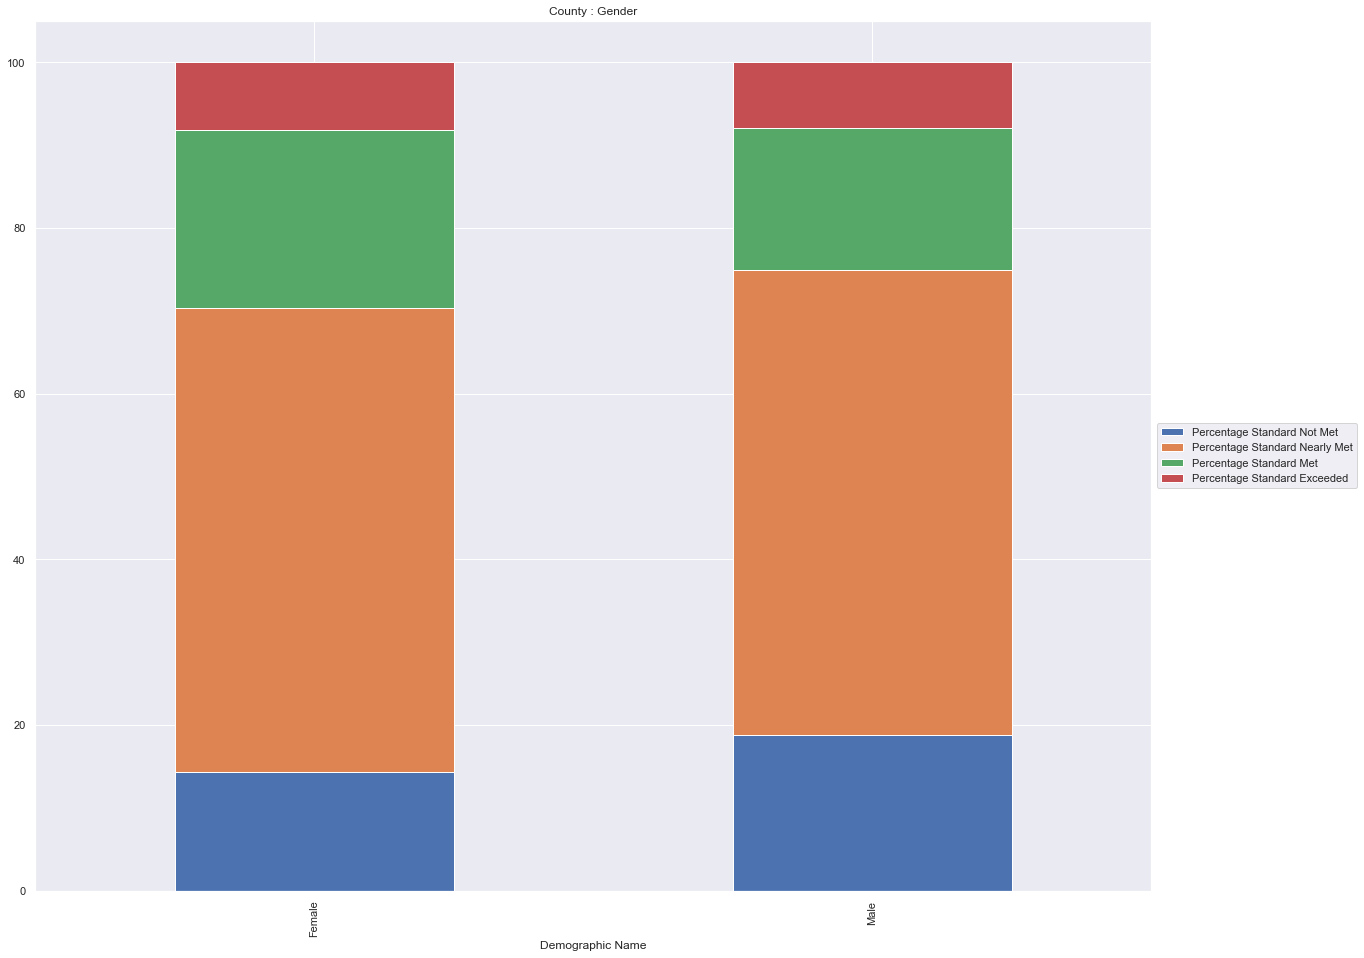

In [185]:
stackedbar(df_county, 'Gender')


In [179]:
stackedbar_interactive(df_county, 'Gender')


In [181]:
df_county.head()

,County Name,Demographic Name,Student Group,Demographic ID,County Code,District Code,School Code,Grade,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met,Total Number of Students with Valid Scores,Life Sciences Domain Percent Below Standard,Life Sciences Domain Percent Near Standard,Life Sciences Domain Percent Above Standard,Physical Sciences Domain Percent Below Standard,Physical Sciences Domain Percent Near Standard,Physical Sciences Domain Percent Above Standard,Earth and Space Sciences Domain Percent Below Standard,Earth and Space Sciences Domain Percent Near Standard,Earth and Space Sciences Domain Percent Above Standard,Zip Code,Median
0,Alpine,All Students,All Students,1.0,2.0,61333.0,6002794.0,9.0,9.305,25.755,58.01,6.925,16.0,48.705,39.61,11.69,32.465,55.845,11.69,34.845,53.25,11.905,96120.0,3042249.5
1,Alpine,Economically disadvantaged,Economic Status,31.0,2.0,61333.0,6002794.0,13.0,0.000,41.670,50.00,8.330,12.0,50.000,41.67,8.33,33.330,66.670,0.00,33.330,41.67,25.000,96120.0,3042249.5
2,Alpine,English only,English-Language Fluency,180.0,2.0,61333.0,6002794.0,9.0,9.305,25.755,58.01,6.925,16.0,48.705,39.61,11.69,32.465,55.845,11.69,34.845,53.25,11.905,96120.0,3042249.5
3,Alpine,Female,Gender,4.0,2.0,61333.0,6002794.0,13.0,15.380,30.770,53.85,0.000,13.0,30.770,46.15,23.08,23.080,53.850,23.08,23.080,53.85,23.080,96120.0,3042249.5
4,Alpine,Fluent English proficient and English only,English-Language Fluency,6.0,2.0,61333.0,6002794.0,9.0,9.305,25.755,58.01,6.925,16.0,48.705,39.61,11.69,32.465,55.845,11.69,34.845,53.25,11.905,96120.0,3042249.5


#### Ethnicity ####

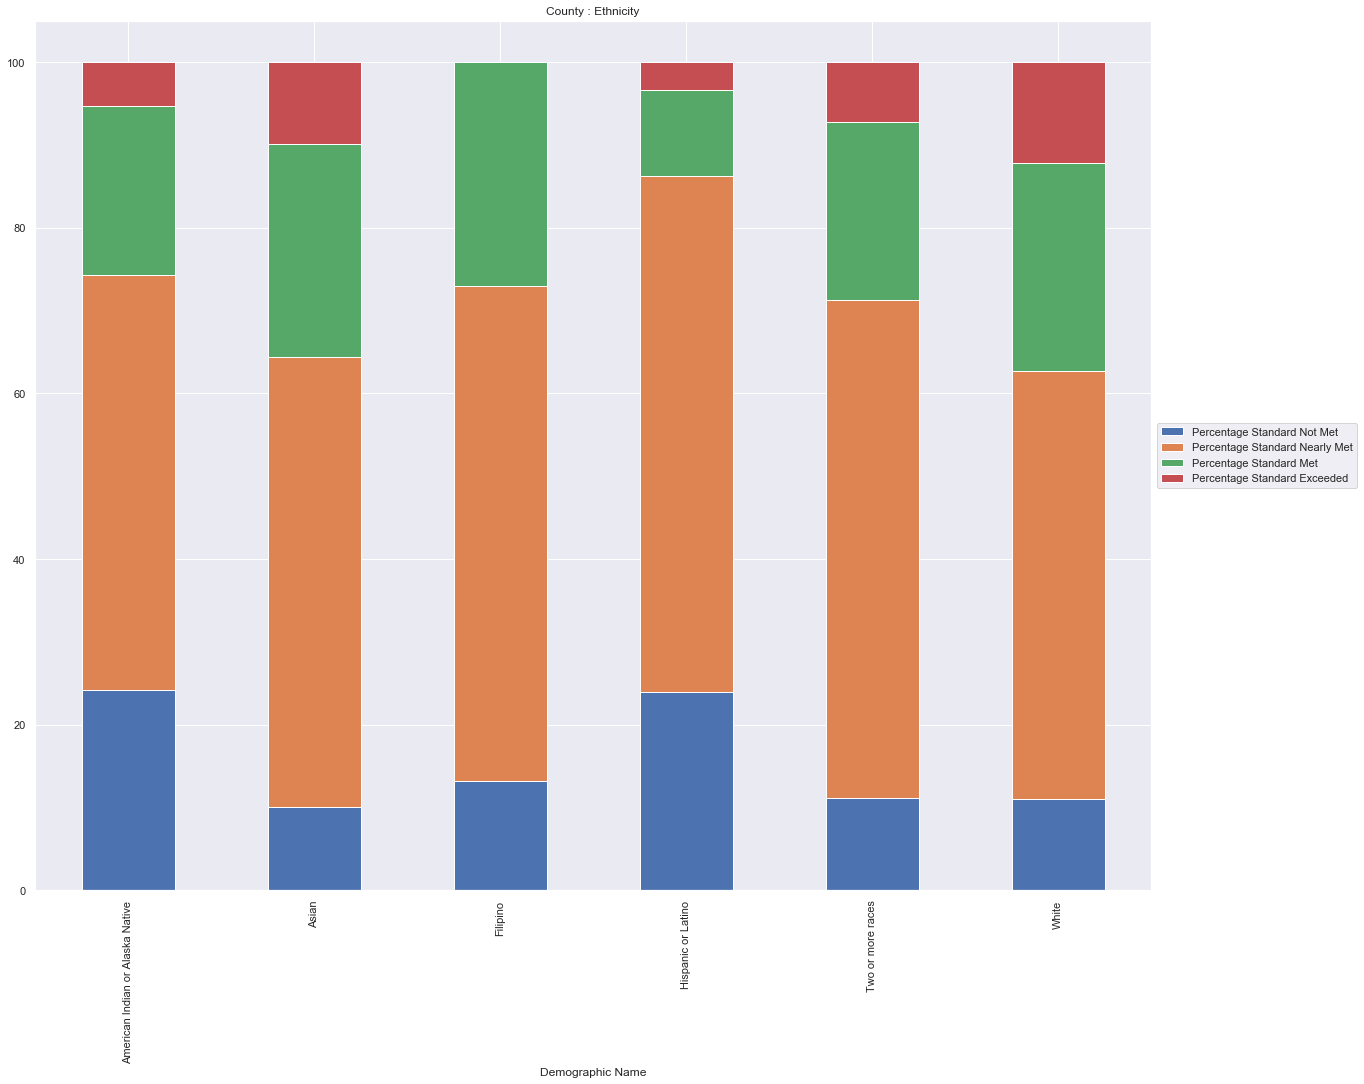

In [180]:
stackedbar(df_county, 'Ethnicity')

In [188]:
stackedbar_interactive(df_county, 'Ethnicity')

#### English-Language Fluency ####

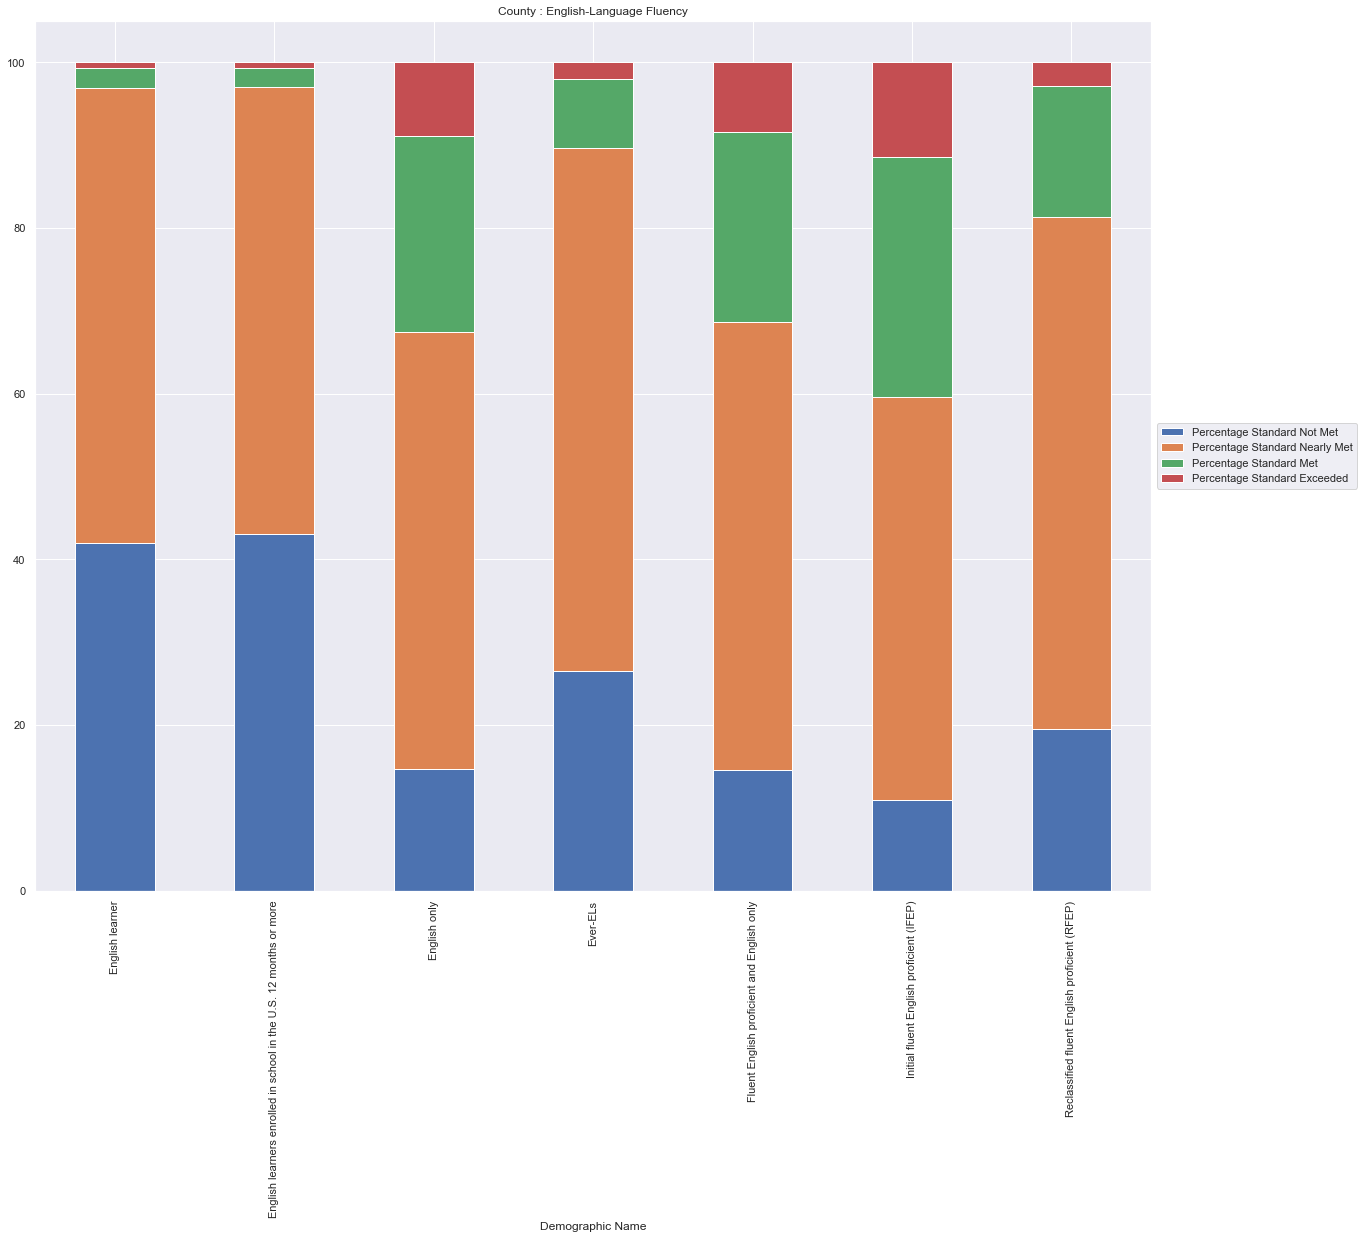

In [189]:
stackedbar(df_county, 'English-Language Fluency')

In [190]:
stackedbar_interactive(df_county, 'English-Language Fluency')

#### Economic Status ####

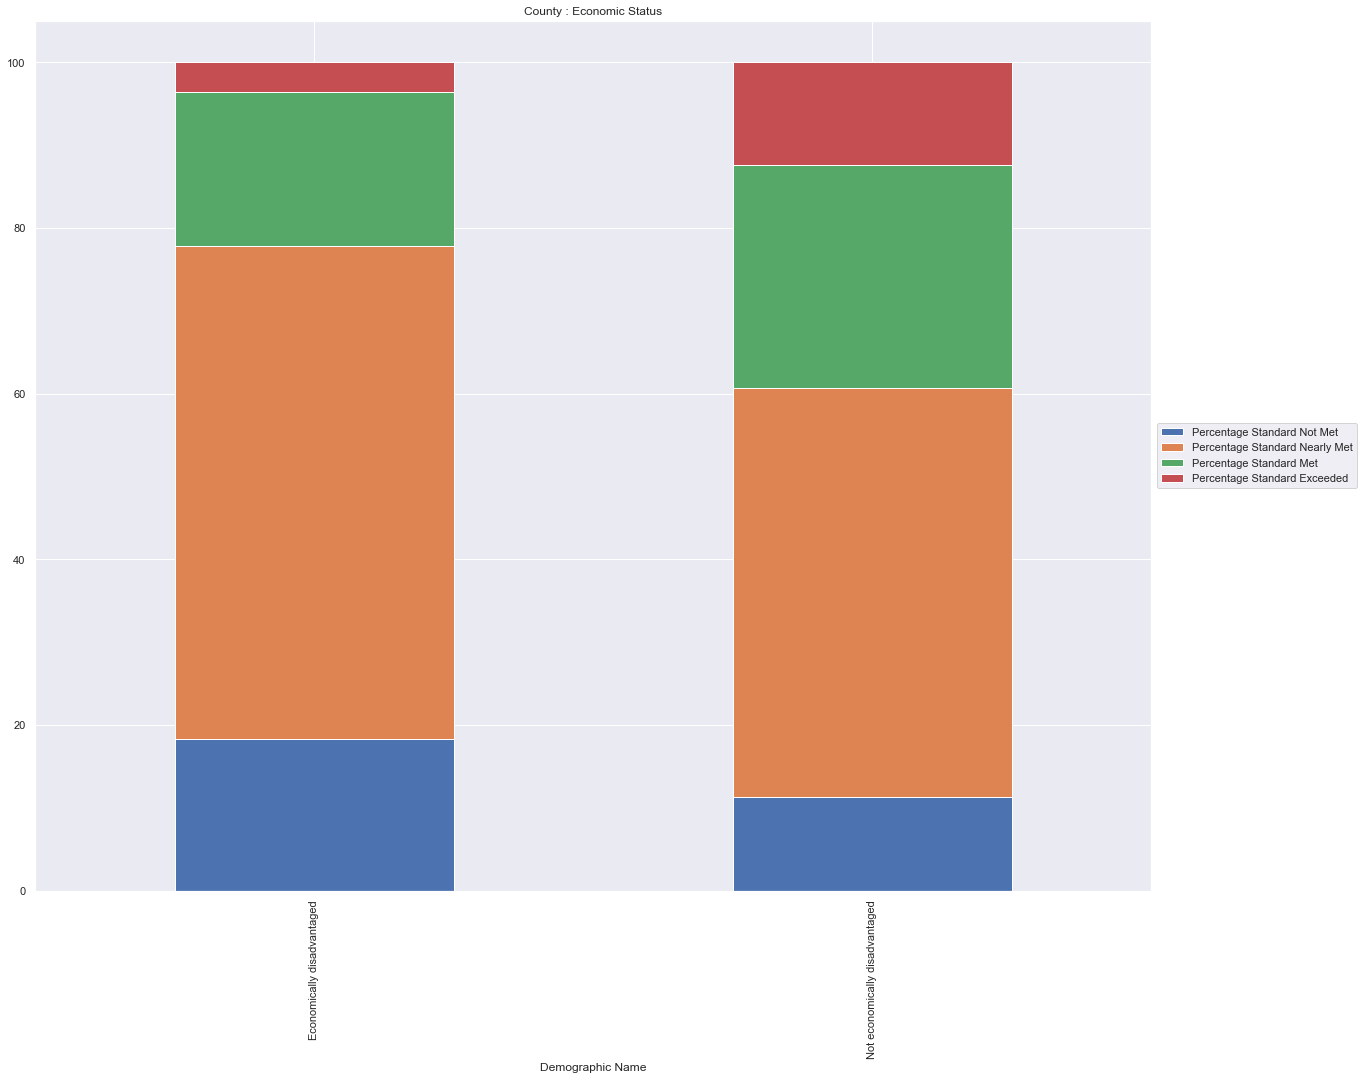

In [191]:
stackedbar(df_county, 'Economic Status')

In [192]:
stackedbar_interactive(df_county, 'Economic Status')

#### Disability Status ####

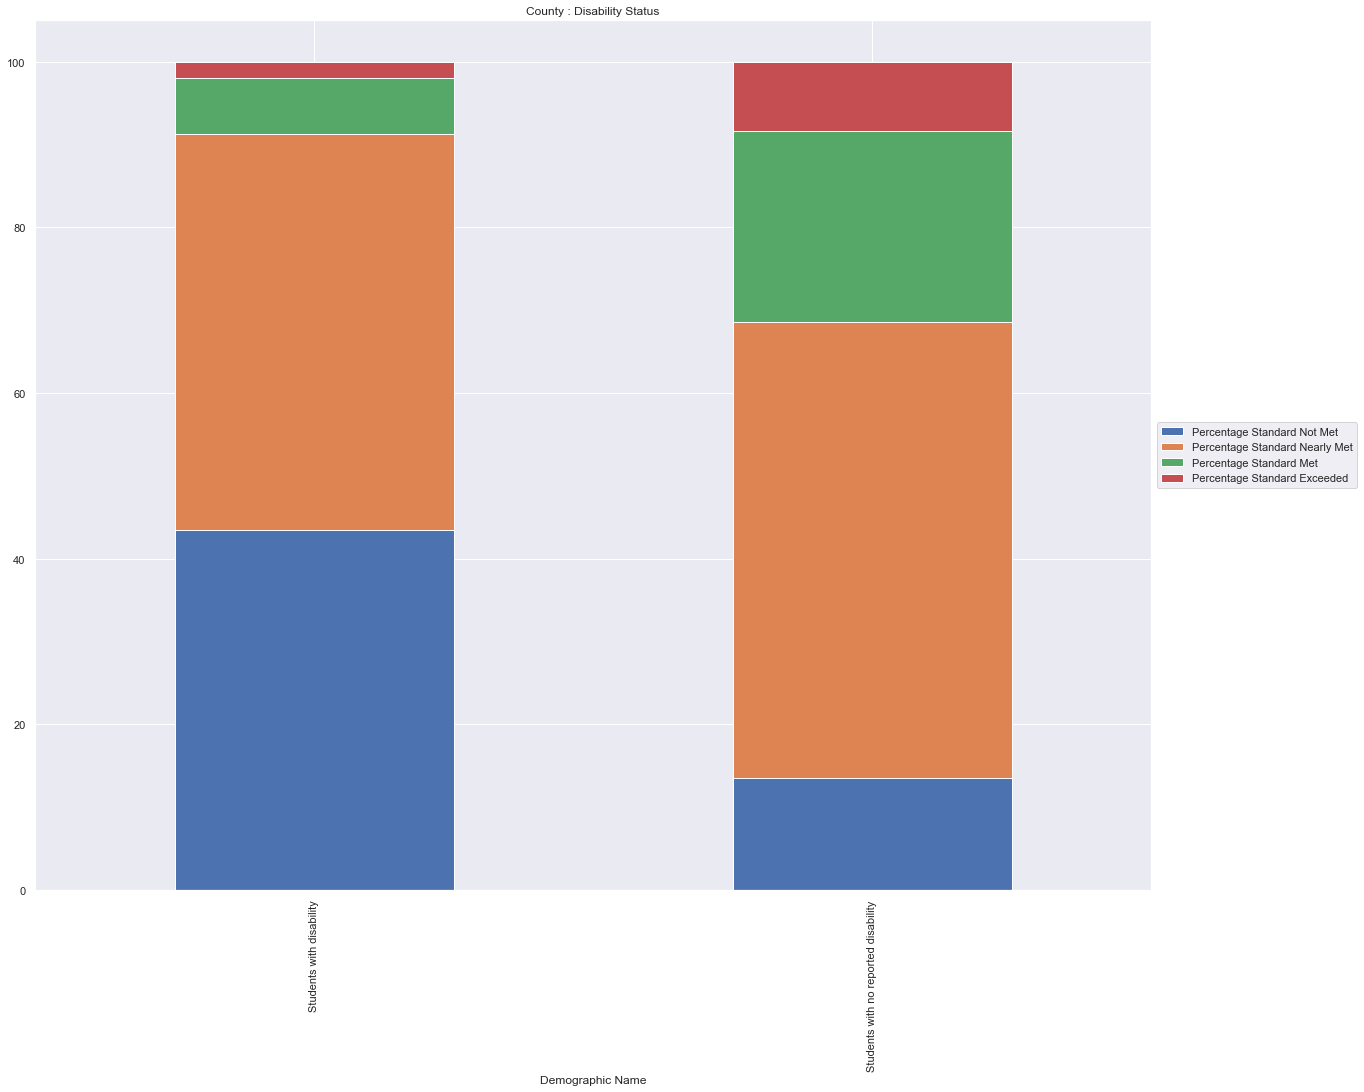

In [193]:
stackedbar(df_county, 'Disability Status')

In [194]:
stackedbar_interactive(df_county, 'Disability Status')

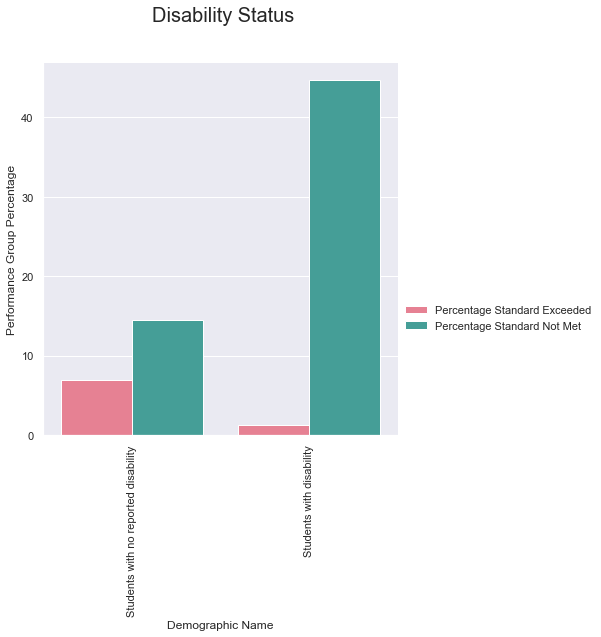

In [195]:
drawBarplotFacetGridEx(final_data, 'Disability Status', ['Percentage Standard Exceeded', 'Percentage Standard Not Met'])

#### Parent Education ####

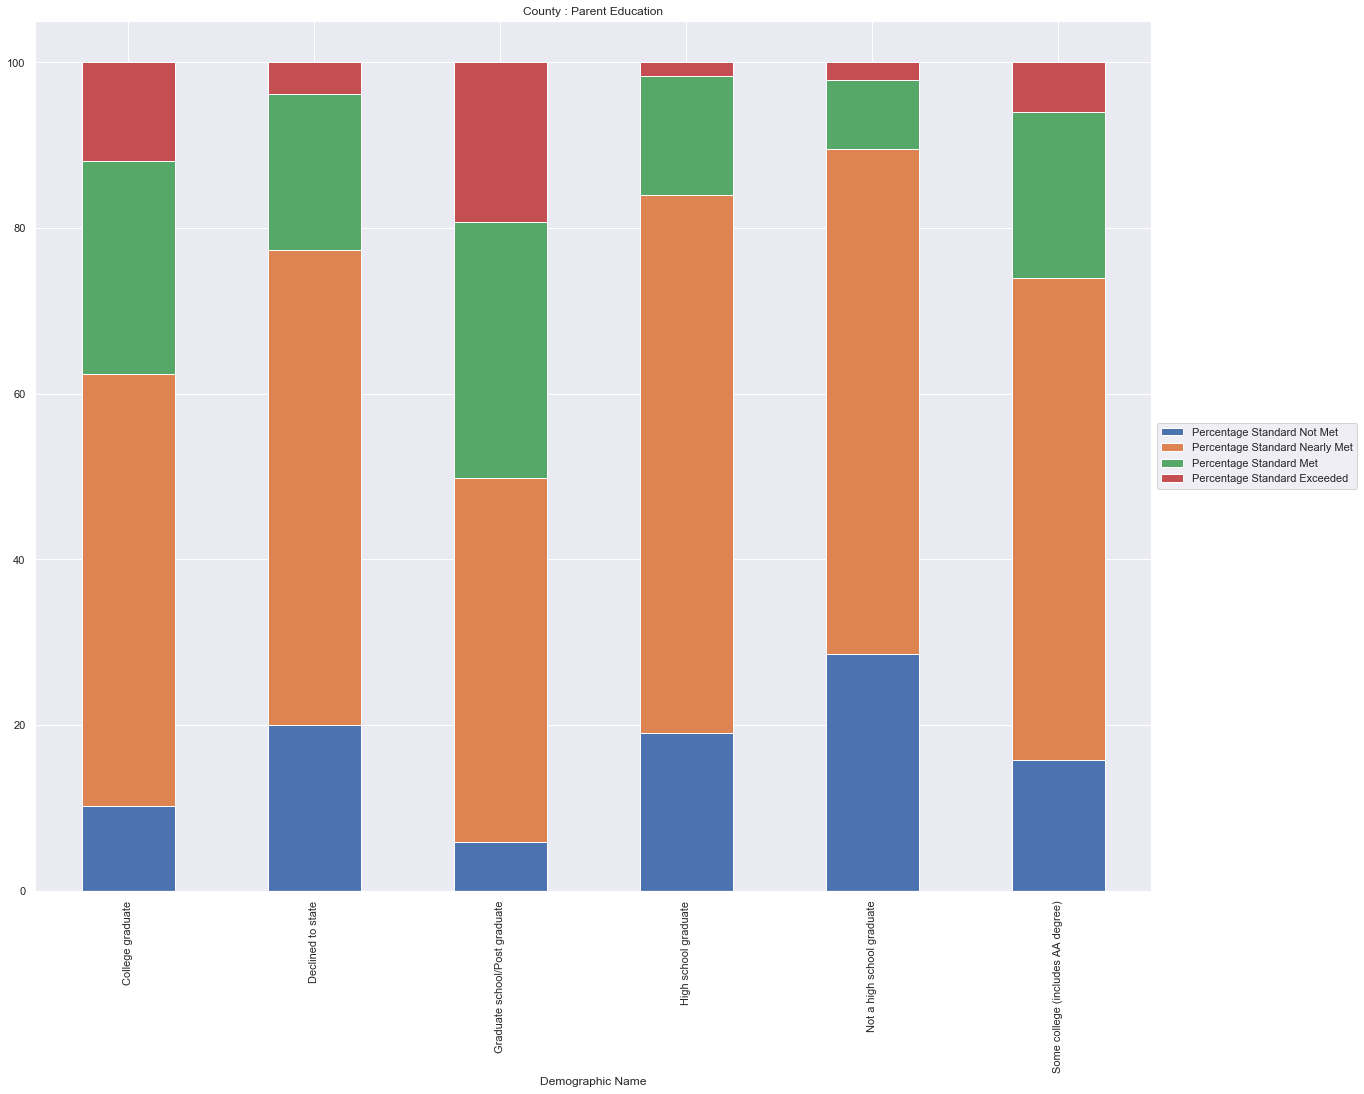

In [196]:
stackedbar(df_county, 'Parent Education')

In [197]:
stackedbar_interactive(df_county, 'Parent Education')

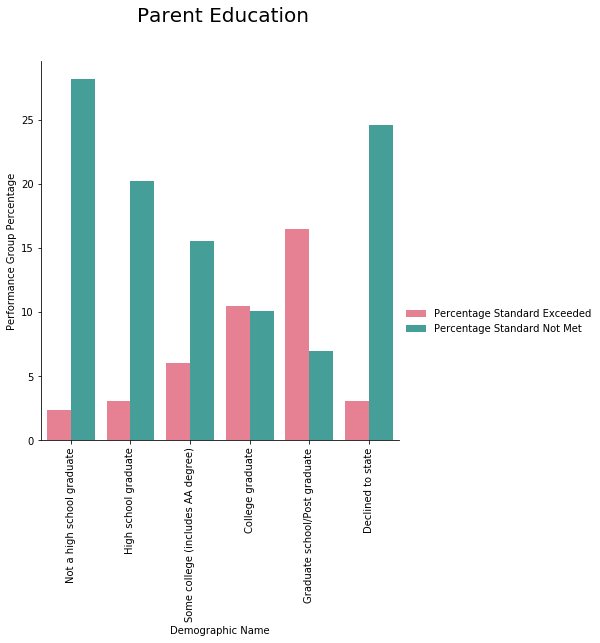

In [133]:
drawBarplotFacetGridEx(final_data, 'Parent Education', ['Percentage Standard Exceeded', 'Percentage Standard Not Met'])


#### Finding the Top/bottom 5 counties with best Science education ####

Top 5 counties with best science education are - 

Bottom 5 counties with best science education are -

#### Insights/Trends ####

- Counties with best science performance are in areas with high home median prices and vice-versa.

- We found that in the best performing counties, the percentage of white students is much higher than the percentage of white students in the whole county.

- Hispanic and Latino students are far more likely to be in the worst performing group than the best performing group. Likewise, Black and American Indian students are more involved in the group with the worst results. In contrast, Asian and white students are more likely to be in the best performing group than the worst performing group.

- The English learners have more difficulties in studying both English and Mathematics than the fluent English speakers.

- When students' parents graduate from graduate schools/post graduates or colleges, students are much more likely to be in the best performing group. For those students, the best performing groups are much larger than the worst performing groups. In contrast, students are more likely to be in the worst performing group when their parents are high school graduates or have lower education.

In [134]:
sns.set_style(style='ticks')
sns.set(rc={'figure.figsize':(20,16)})

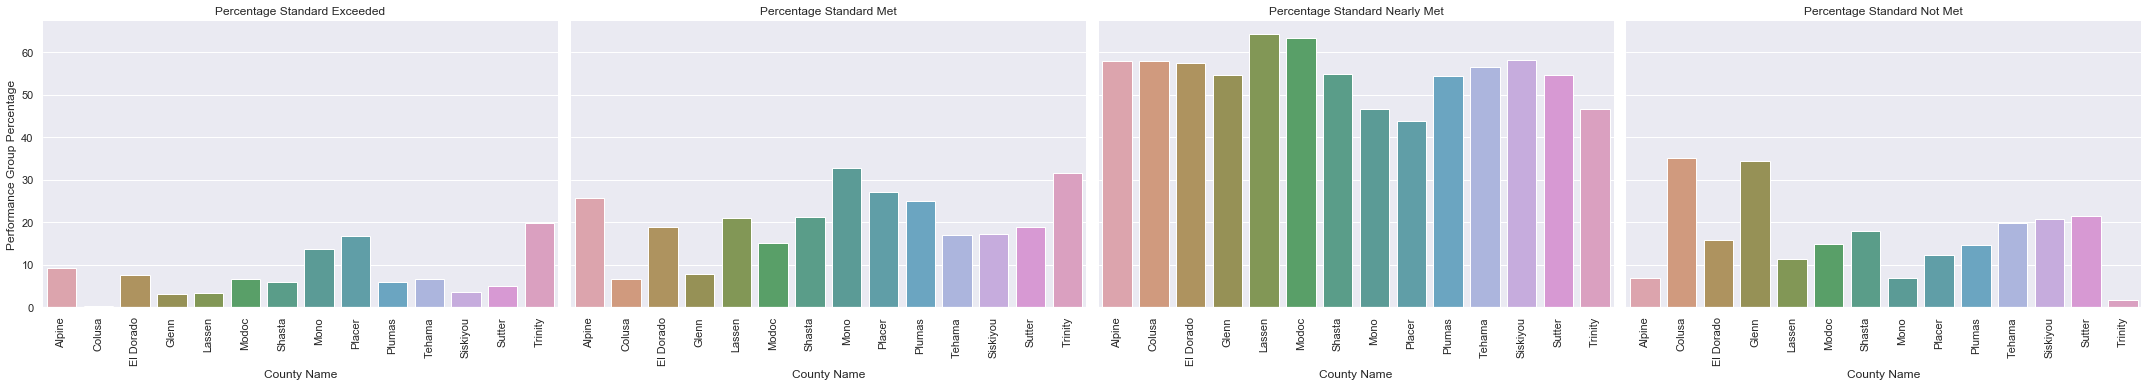

In [198]:
saturation_p =0.5
aspect_p = 1.5

def drawBarplotCatplot2(df, stud_grp, saturation_p, aspect_p, _x, _y, _col):
    df_local = df.loc[(df["Student Group"] == stud_grp)]
    
    #x="Student Groups", y="Students with Scores", col="Test Id", hue="Rank"
    g = sns.catplot(x=_x, y=_y, col=_col,
                data=df_local, saturation=saturation_p,
                kind="bar", ci=None, aspect=aspect_p)
    (
        g.set_axis_labels(_x, _y)
        .set_titles("{col_name}")
        .despine(left=True)
        .set_xticklabels(rotation=90)
    )  

drawBarplotCatplot2(final_data, 'All Students', saturation_p, aspect_p, "County Name", "Performance Group Percentage", "Performance Group")

In [199]:
#df: data
#scoreLevel: "School Name", "District Name", "County Name"
#num: top and bottom parameter
def getDFTop_Low(df, scoreLevel, num):
    sci_df = df.loc[(df["Demographic Name"] == "All Students") ]
                                    
    sci_top = sci_df.nlargest(num, 'Percentage Standard Exceeded')
    sci_low = sci_df.nlargest(num, 'Percentage Standard Not Met')
    
    print("{}{}{}{}{}".format("* Science Toppers ", num, " ", scoreLevel,"s:"))
    print(sci_top[scoreLevel].values.tolist())

    print("{}{}{}{}{}".format("* Science Lowers ", num, " ", scoreLevel,"s:"))
    print(sci_low[scoreLevel].values.tolist())

    
    #Retreive all data of the top and bottom schools/districts/counties
    top_sci_all = df.loc[df[scoreLevel].isin(sci_top[scoreLevel])]                                          
    low_sci_all = df.loc[df[scoreLevel].isin(sci_low[scoreLevel])]
                                                   
    
    top_sci_all["Rank"] = "Top"
    low_sci_all["Rank"] = "Bottom"
    
    df_local = pd.concat([top_sci_all, low_sci_all])    
    return df_local

In [200]:
dfTop_Low = getDFTop_Low(df, "County Name", 3)
dfTop_Low

* Science Toppers 3 County Names:
['Tehama', 'Tehama', 'Placer']
* Science Lowers 3 County Names:
['Sutter', 'Sutter', 'Shasta']


,Demographic ID,Demographic Name,Student Group,County Code,District Code,School Code,Grade,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met,Total Number of Students with Valid Scores,Life Sciences Domain Percent Below Standard,Life Sciences Domain Percent Near Standard,Life Sciences Domain Percent Above Standard,Physical Sciences Domain Percent Below Standard,Physical Sciences Domain Percent Near Standard,Physical Sciences Domain Percent Above Standard,Earth and Space Sciences Domain Percent Below Standard,Earth and Space Sciences Domain Percent Near Standard,Earth and Space Sciences Domain Percent Above Standard,County Name,District Name,School Name,Zip Code,Median,Rank
78,1,All Students,All Students,31,66944,106807,8,19.77,32.56,41.86,5.81,172.0,23.84,56.98,19.19,22.09,54.65,23.26,23.84,52.91,23.26,Placer,Tahoe-Truckee Unified,Alder Creek Middle,96161,875819.0,Top
79,1,All Students,All Students,31,66944,106807,13,19.77,32.56,41.86,5.81,172.0,23.84,56.98,19.19,22.09,54.65,23.26,23.84,52.91,23.26,Placer,Tahoe-Truckee Unified,Alder Creek Middle,96161,875819.0,Top
80,1,All Students,All Students,31,66944,121624,5,20.00,40.00,40.00,0.00,25.0,12.00,56.00,32.00,12.00,68.00,20.00,12.00,64.00,24.00,Placer,Sierra Expeditionary Learning,Sierra Expeditionary Learning,96161,875819.0,Top
81,1,All Students,All Students,31,66944,121624,8,22.73,31.82,45.45,0.00,22.0,4.55,68.18,27.27,22.73,50.00,27.27,31.82,45.45,22.73,Placer,Sierra Expeditionary Learning,Sierra Expeditionary Learning,96161,875819.0,Top
82,1,All Students,All Students,31,66944,121624,13,21.28,36.17,42.55,0.00,47.0,8.51,61.70,29.79,17.02,59.57,23.40,21.28,55.32,23.40,Placer,Sierra Expeditionary Learning,Sierra Expeditionary Learning,96161,875819.0,Top
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5685,226,White,Ethnicity for Not Economically Disadvantaged,51,71449,5137500,11,2.60,18.18,58.44,20.78,77.0,31.17,62.34,6.49,38.96,54.55,6.49,37.66,53.25,9.09,Sutter,Sutter Union High,Sutter High,95982,403892.5,Bottom
5686,226,White,Ethnicity for Not Economically Disadvantaged,51,71449,5137500,13,2.89,23.70,58.96,14.45,173.0,31.79,58.96,9.25,43.93,49.71,6.36,35.26,54.91,9.83,Sutter,Sutter Union High,Sutter High,95982,403892.5,Bottom
5694,227,Two or more races,Ethnicity for Not Economically Disadvantaged,45,70136,106013,13,15.79,47.37,31.58,5.26,19.0,10.53,73.68,15.79,21.05,42.11,36.84,31.58,42.11,26.32,Shasta,University Preparatory,University Preparatory,96001,654232.0,Bottom
5695,227,Two or more races,Ethnicity for Not Economically Disadvantaged,45,69971,6111470,13,15.38,23.08,38.46,23.08,13.0,38.46,38.46,23.08,38.46,46.15,15.38,61.54,15.38,23.08,Shasta,Enterprise Elementary,Boulder Creek Elementary,96003,462127.0,Bottom


#### Neighborhood home prices ####

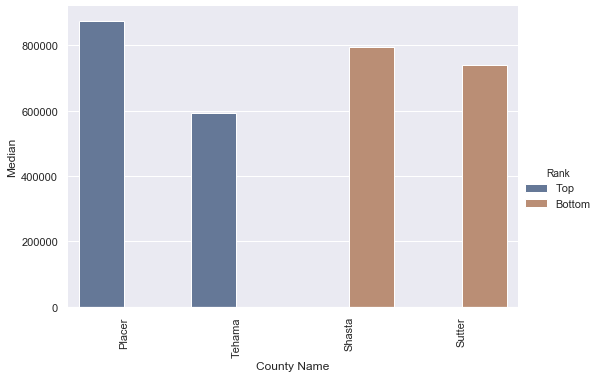

In [201]:
def drawBarplotCatplot1(df, category, _x, _y, _hue):
    df_local = df.loc[(df["Student Group"] == category)]
    g = sns.catplot(x=_x, y=_y, hue=_hue, 
                    data=df_local, saturation=saturation_p,
                    kind="bar", ci=None, aspect=aspect_p)
    (g.set_axis_labels(_x, _y)
     .despine(left=True)
     .set_xticklabels(rotation=90))  

drawBarplotCatplot1(dfTop_Low, "All Students", "County Name", "Median", "Rank")


In [202]:
def drawBarplotCatplot(df, category, saturation_p, aspect_p, _x, _y, _hue):
    df_local = df.loc[(df["Student Group"] == category)]
    
    g = sns.catplot(x=_x, y=_y, hue=_hue,
                data=df_local, saturation=saturation_p,
                kind="bar", ci=None, aspect=aspect_p)
    (
        g.set_axis_labels(category, "Number of Students")
        # .set_xticklabels(["Men", "Women", "Children"])
        .set_titles("{col_name} {col_var}")
        #  .set(ylim=(0, 1))
        .despine(left=True)
        .set_xticklabels(rotation=90)
    )

### Demographic Name ###

#### Gender ####

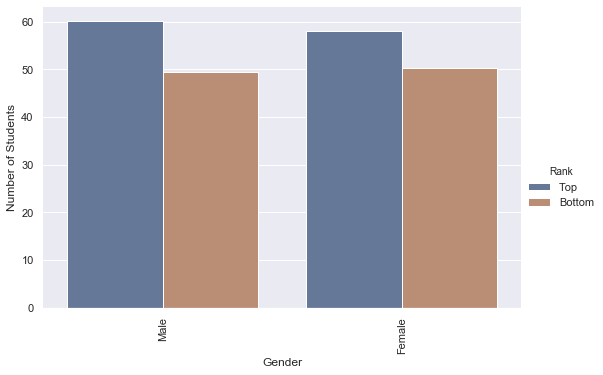

In [203]:
drawBarplotCatplot(dfTop_Low, "Gender", saturation_p, asepct_p, "Demographic Name", "Total Number of Students with Valid Scores", "Rank")

#### Ethinicity ####

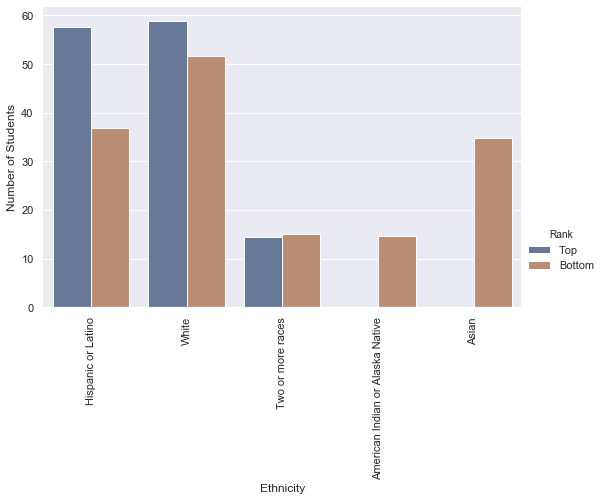

In [204]:
drawBarplotCatplot(dfTop_Low, "Ethnicity", saturation_p, aspect_p, "Demographic Name", "Total Number of Students with Valid Scores", "Rank")

#### English-Language Fluency ####

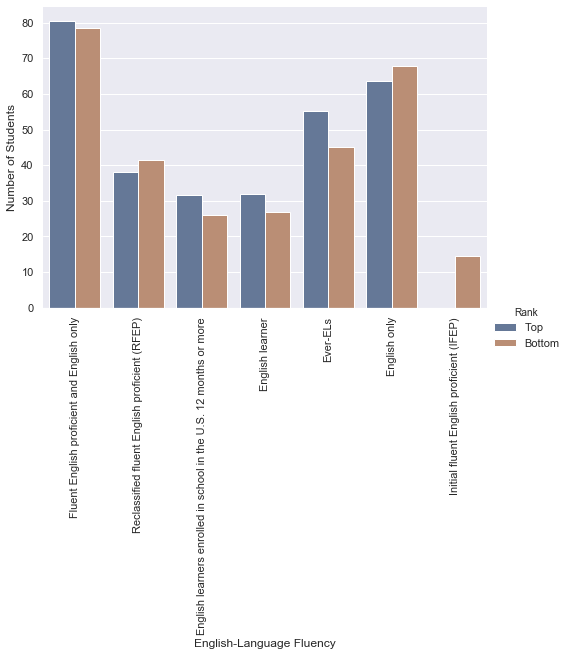

In [205]:
drawBarplotCatplot(dfTop_Low, "English-Language Fluency", saturation_p, aspect_p, "Demographic Name", "Total Number of Students with Valid Scores", "Rank")

#### Economic Status ####

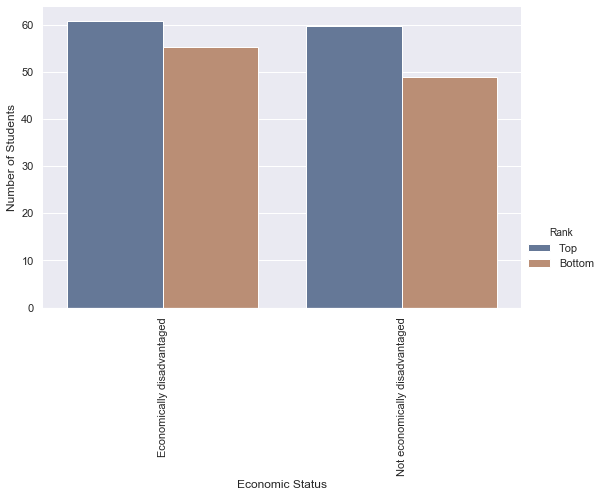

In [206]:
drawBarplotCatplot(dfTop_Low, "Economic Status", saturation_p, aspect_p, "Demographic Name", "Total Number of Students with Valid Scores", "Rank")


#### Parent Education ####

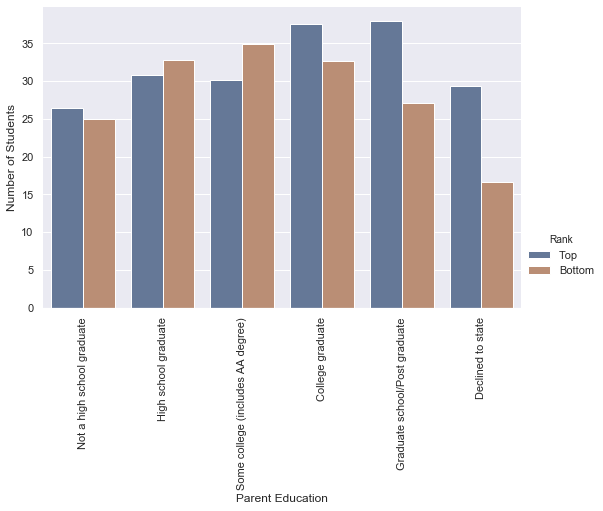

In [207]:
drawBarplotCatplot(dfTop_Low, "Parent Education", saturation_p, aspect_p, "Demographic Name", "Total Number of Students with Valid Scores", "Rank")

#### Best and Wrost schools in each Demographic Name ####

In [212]:
id = df.groupby(["Student Group", "Demographic Name"])["Percentage Standard Exceeded"].transform(max) == df["Percentage Standard Exceeded"]
df[id].head()

,Demographic ID,Demographic Name,Student Group,County Code,District Code,School Code,Grade,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met,Total Number of Students with Valid Scores,Life Sciences Domain Percent Below Standard,Life Sciences Domain Percent Near Standard,Life Sciences Domain Percent Above Standard,Physical Sciences Domain Percent Below Standard,Physical Sciences Domain Percent Near Standard,Physical Sciences Domain Percent Above Standard,Earth and Space Sciences Domain Percent Below Standard,Earth and Space Sciences Domain Percent Near Standard,Earth and Space Sciences Domain Percent Above Standard,County Name,District Name,School Name,Zip Code,Median
363,1,All Students,All Students,52,71555,6053540,5,45.45,18.18,36.36,0.00,11.0,9.09,45.45,45.45,18.18,54.55,27.27,27.27,18.18,54.55,Tehama,Kirkwood Elementary,Kirkwood Elementary,96021,456240.0
467,3,Male,Gender,45,70136,106013,12,32.14,48.21,19.64,0.00,56.0,5.36,48.21,46.43,5.36,60.71,33.93,8.93,50.00,41.07,Shasta,University Preparatory,University Preparatory,96001,654232.0
724,4,Female,Gender,31,66944,6113062,5,36.17,25.53,36.17,2.13,47.0,17.02,55.32,27.66,14.89,53.19,31.91,14.89,53.19,31.91,Placer,Tahoe-Truckee Unified,Glenshire Elementary,96161,875819.0
725,4,Female,Gender,31,66944,6113062,13,36.17,25.53,36.17,2.13,47.0,17.02,55.32,27.66,14.89,53.19,31.91,14.89,53.19,31.91,Placer,Tahoe-Truckee Unified,Glenshire Elementary,96161,875819.0
1286,6,Fluent English proficient and English only,English-Language Fluency,52,71555,6053540,13,33.33,16.67,44.44,5.56,18.0,27.78,44.44,27.78,33.33,44.44,22.22,38.89,27.78,33.33,Tehama,Kirkwood Elementary,Kirkwood Elementary,96021,456240.0


Let's compare the trends of Standard/Exceeded/Not Met wrt median home rpice

In [225]:
def drawScatterplot(df, category, levelName, perfCol):
    df_local = df.loc[(df['Student Group'] == category)]
    g = sns.FacetGrid(df_local, hue="Demographic Name", size=15)
    g.map(plt.scatter, levelName, perfCol, alpha=0.5, palette='Set1' )
    g.add_legend();
    g.set_xticklabels(rotation=90) 

#### Percentage Standard Exceeded####

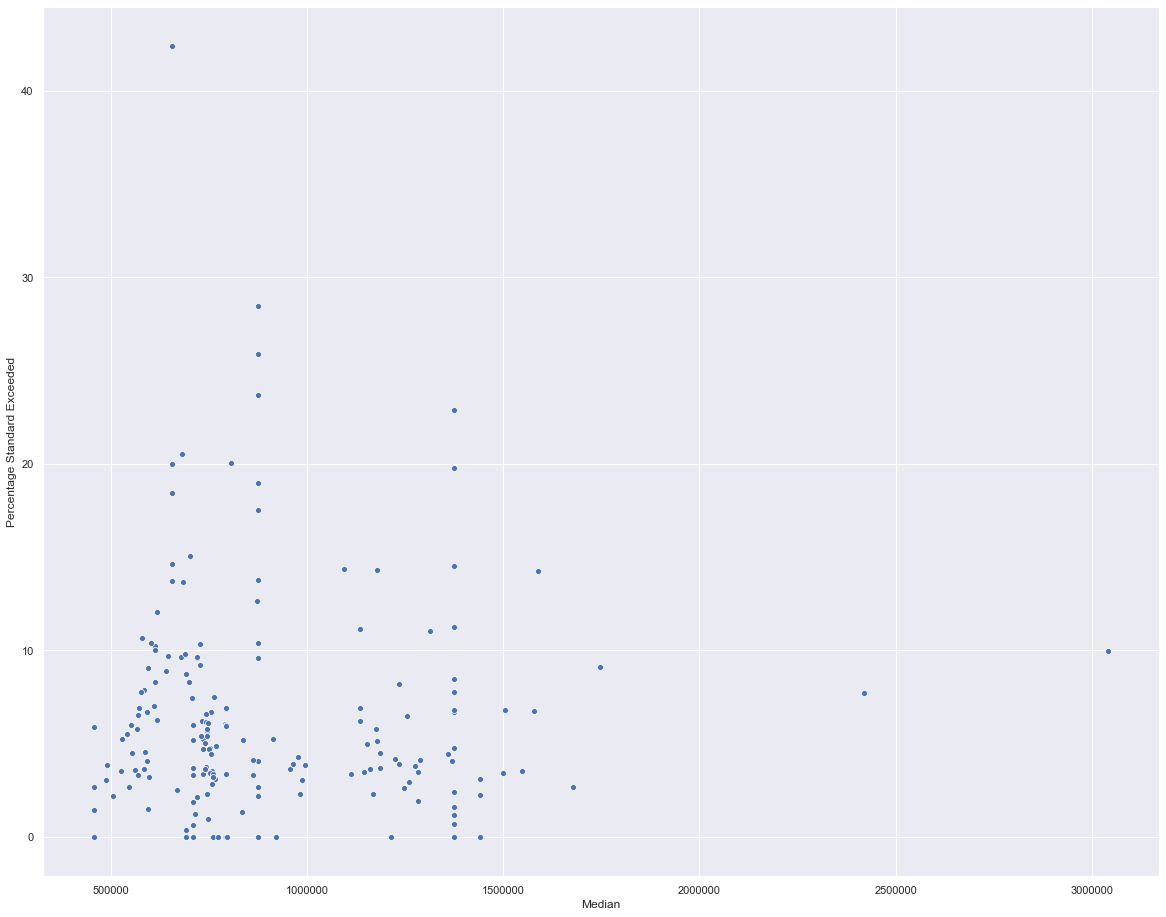

In [228]:
df_local = df_county.loc[(final_data['Demographic Name'] == "All Students")].groupby('School Code').mean()
ax = sns.scatterplot(x="Median", y='Percentage Standard Exceeded', data=df_local)


#### Percentage Standard Not Met ####

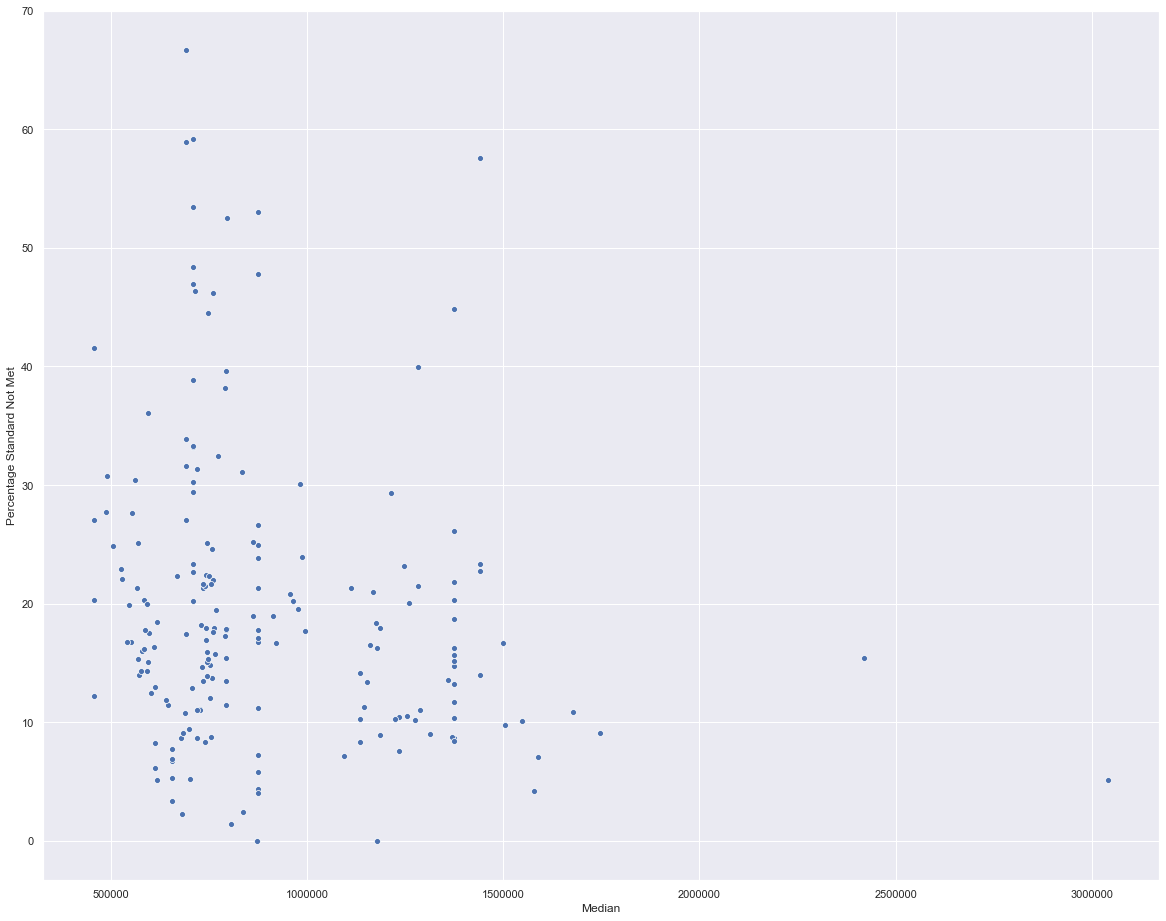

In [231]:
df_local = df_county.loc[(final_data['Demographic Name'] == "All Students")].groupby('School Code').mean()
ax = sns.scatterplot(x="Median", y='Percentage Standard Not Met', data=df_local)


We see there is a high correlation between home median prices and the percentage of standard met. Higher the prices, higher the standard met.

### Future Scope ###

1. The county and schools can be visualized using Nominatim maps with color code that can give useful information on counties/districts with good/bad science education.
2. The nature of political incline can be correlated (too conservative people not choosing to understand/promote science and vice-versa.
3. Teachers pay/demography/education of teachers relationship with the performance of the school.
4. Student/Teachers ratio, funding for school and infrastructure available to understand the quality of education.
5. Use data from GreatSchools.org to understand the ranking and their correlation with more information gathered from the site.